# The Numbers of Music:
### A Short History of Music, as told by the Billboard Hot 100

Music has been an integral part of world cultures for thousands of years. Styles and songs have come and gone, but the concept of rating music has been a relatively new concept. Since the late 1950s, Billboard has been tracking the popularity of songs....

## TODO: Finish this intro!

## Data Description

Our data was taken from the Billboard Top 100 website using the billboard.py API which can be found [here](https://github.com/guoguo12/billboard-charts). Using the API, we were able to get every Billboard Top 100 chart from mid-1958 until February 2018. Once all of these charts were retrieved, we extracted them into .json files using the merge_json.py script which can be found in our github repository [here](https://github.com/COGS108/Pr_089/blob/master/merge_json.py) Using this data, we plan to...

# TODO: FINISH DATA DESCRIPTION BY SAYING WHAT WE WANT TO DO WITH IT


In [4]:
# Imports for the project

%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sys import stdout as std

The data for this project was grabbed from the Billboard Hot-100 chart using an API called "billboard.py" found [here](https://github.com/guoguo12/billboard-charts)

The downloaded charts were extracted into .json files and merged into a full .json file using the Python scripts found in the project directory on GitHub.

In [5]:
# Read in the data into DataFrames to start our analysis


df2 = pd.read_json('./full_data.json')

In [6]:
# Now, let's sort this data to get it formatted where each row is a full chart and each entry is a
# list of attributes relating to the song at that position


sort_mod_df = df2.reindex_axis(sorted(df2.columns), axis=1)

# Let's examine the dataframe
sort_mod_df.head()


,1,2,3,4,5,6,7,8,9,10,...,91,92,93,94,95,96,97,98,99,100
0,"[God's Plan, Drake, 1, 1, 4]","[Perfect, Ed Sheeran, 1, 2, 25]","[Finesse, Bruno Mars & Cardi B, 3, 3, 7]","[Havana, Camila Cabello Featuring Young Thug, ...","[Rockstar, Post Malone Featuring 21 Savage, 1,...","[Look Alive, BlocBoy JB Featuring Drake, 6, 0, 1]","[Meant To Be, Bebe Rexha & Florida Georgia Lin...","[New Rules, Dua Lipa, 6, 6, 29]","[All The Stars, Kendrick Lamar & SZA, 9, 31, 6]","[Stir Fry, Migos, 8, 8, 8]",...,"[Black Panther, Kendrick Lamar, 91, 0, 1]","[At The Club, Jacquees X Dej Loaf, 92, 92, 2]","[Codeine Dreaming, Kodak Black Featuring Lil W...","[The Long Way, Brett Eldredge, 93, 93, 2]","[Rock, Plies, 95, 99, 3]","[I Like Me Better, Lauv, 96, 0, 1]","[When We, Tank, 86, 0, 7]","[Criminal, Natti Natasha x Ozuna, 95, 95, 3]","[IDGAF, Dua Lipa, 88, 88, 5]","[Rewrite The Stars, Zac Efron & Zendaya, 70, 8..."
1,"[God's Plan, Drake, 1, 1, 3]","[Perfect, Ed Sheeran, 1, 2, 24]","[Finesse, Bruno Mars & Cardi B, 3, 3, 6]","[Havana, Camila Cabello Featuring Young Thug, ...","[Rockstar, Post Malone Featuring 21 Savage, 1,...","[New Rules, Dua Lipa, 6, 7, 28]","[Pray For Me, The Weeknd & Kendrick Lamar, 7, ...","[Stir Fry, Migos, 8, 12, 7]","[Meant To Be, Bebe Rexha & Florida Georgia Lin...","[Bad At Love, Halsey, 5, 6, 23]",...,"[Mayores, Becky G Featuring Bad Bunny, 74, 95,...","[At The Club, Jacquees X Dej Loaf, 92, 0, 1]","[The Long Way, Brett Eldredge, 93, 0, 1]","[Singles You Up, Jordan Davis, 94, 0, 1]","[Criminal, Natti Natasha x Ozuna, 95, 0, 2]","[Corazon, Maluma X Nego do Borel, 87, 100, 6]","[Sick Boy, The Chainsmokers, 65, 90, 3]","[A Girl Like You, Easton Corbin, 98, 0, 1]","[Rock, Plies, 99, 0, 2]","[Supplies, Justin Timberlake, 71, 0, 2]"
2,"[God's Plan, Drake, 1, 1, 2]","[Perfect, Ed Sheeran, 1, 2, 23]","[Finesse, Bruno Mars & Cardi B, 3, 5, 5]","[Havana, Camila Cabello Featuring Young Thug, ...","[Rockstar, Post Malone Featuring 21 Savage, 1,...","[Bad At Love, Halsey, 5, 6, 22]","[New Rules, Dua Lipa, 7, 8, 27]","[MotorSport, Migos, Nicki Minaj & Cardi B, 6, ...","[Say Something, Justin Timberlake Featuring Ch...","[Thunder, Imagine Dragons, 4, 9, 40]",...,"[Rubbin Off The Paint, YBN Nahmir, 46, 69, 13]","[El Farsante, Ozuna & Romeo Santos, 92, 0, 1]","[IDGAF, Dua Lipa, 92, 92, 3]","[Most People Are Good, Luke Bryan, 94, 0, 1]","[Mayores, Becky G Featuring Bad Bunny, 74, 94,...","[CC, Migos Featuring Gucci Mane, 96, 0, 1]","[Best Friend, Sofi Tukker Featuring NERVO, The...","[MIC Drop, BTS Featuring Desiigner, 28, 84, 10]","[King's Dead, Jay Rock, Kendrick Lamar, Future...","[Corazon, Maluma X Nego do Borel, 87, 93, 5]"
3,"[God's Plan, Drake, 1, 0, 1]","[Perfect, Ed Sheeran, 1, 2, 22]","[Havana, Camila Cabello Featuring Young Thug, ...","[Rockstar, Post Malone Featuring 21 Savage, 1,...","[Finesse, Bruno Mars & Cardi B, 3, 4, 4]","[Bad At Love, Halsey, 5, 5, 21]","[Diplomatic Immunity, Drake, 7, 0, 1]","[New Rules, Dua Lipa, 8, 8, 26]","[Thunder, Imagine Dragons, 4, 6, 39]","[No Limit, G-Eazy Featuring A$AP Rocky & Cardi...",...,"[Beautiful Trauma, P!nk, 91, 99, 5]","[IDGAF, Dua Lipa, 92, 92, 2]","[Corazon, Maluma X Nego do Borel, 87, 87, 4]","[Mayores, Becky G Featuring Bad Bunny, 74, 93,...","[The Greatest Show, Hugh Jackman, Keala Settle...","[Never Enough, Loren Allred, 88, 97, 4]","[My Dawg, Lil Baby, 71, 90, 7]","[I'll Name The Dogs, Blake Shelton, 56, 82, 20]","[Rock, Plies, 99, 0, 1]","[Female, Keith Urban, 69, 100, 5]"
4,"[Havana, Camila Cabello Featuring Young Thug, ...","[Perfect, Ed Sheeran, 1, 1, 21]","[Rockstar, Post Malone Featuring 21 Savage, 1,...","[Finesse, Bruno Mars & Cardi B, 3, 3, 3]","[Bad At Love, Halsey, 5, 7, 20]","[Thunder, Imagine Dragons, 4, 6, 38]","[No Limit, G-Eazy Featuring A$AP Rocky & Cardi...","[New Rules, Dua Lipa, 8, 11, 25]","[Too Good At Goodbyes, Sam Smith, 4, 8, 19]","[MotorSport, Migos, Nicki Minaj & Cardi B, 6, ...",...,"[King's Dead, Jay Rock, Kendrick Lamar, Future...","[IDGAF, Dua Lipa, 92

We have our song data! Now to extract and clean it up a bit. Though the above format makes it pretty easy to track a particular song over the chart, we also want to separate each attribute so that we can grab particular portions of our data more easily.

To do this, we'll want to change the columns to represent a specific attribute of the chart. Currently, each chart takes up a full row where each columns is the particular rank of a song in that chart, but we're going to change the shape so that there will be 6 columns instead of 100, with 310,800 rows instead of 3,108.

In [7]:
# Save the current chart week numbers in a list for restoration later

SongWeeks = []
curr_pos = []
for num in range(len(sort_mod_df)):
    
    SongWeeks.append(num)
    
for num in range(1, 101):
    curr_pos.append(num)

In [8]:
# Let's now see how many entries are blank in our data
n_nan = sort_mod_df.isnull().sum()
n_nan = sum(n_nan)
print(n_nan)

126


In [9]:
# Replae NaN entries with a default value
sort_mod_df.fillna(-1, inplace=True)

In [10]:
# Verify that blank entries are gone
n_nan = sort_mod_df.isnull().sum()
n_nan = sum(n_nan)
print(n_nan)

0


Blank data would have been a problem to deal with, so we've replaced any blank entry in our previous dataframe with the number -1. This will make it easy to identify where the missing entries are.

The next section separates out each entry of the DataFrame, organizing it into lists. Then, those lists are turned into Pandas Series objects and combined into a cleaned out DataFrame with the desired shape.

In [11]:
# Next, put all of the song attributes into separate lists to use as columns

# Create the lists
SongName = []
Artist = []
PeakPos = []
LastPos = []
NumWeeks = []

# Iterate through the entire dataframe
for index, series in sort_mod_df.iterrows():
    
    # Grab particular entries from the current row
    for entry in series:
        
        # Handle case of missing data
        if entry == -1:
            nm = entry
            NumWeeks.append(nm)
            LastPos.append(nm)
            PeakPos.append(nm)
            Artist.append(nm)
            SongName.append(nm)
        else:
            for i in range(0, 5):
                nm = entry.pop()
                if i == 0:
                    NumWeeks.append(nm)
                elif i == 1:
                    LastPos.append(nm)
                elif i == 2:
                    PeakPos.append(nm)
                elif i == 3:
                    Artist.append(nm)
                elif i == 4:
                    SongName.append(nm)

In [12]:
# Delete the copy dataframe. It's all empty now, anyway
try:
    del sort_mod_df
except(NameError):
    pass

# Now, let's build a nicely cleaned dataframe

# Use a list comprehension to extend out our SongWeeks list
new_SongWeeks = [item for item in SongWeeks for i in range(100)]

# Use a list comprehension to extend the 1-100 list
new_currPos = [num for i in range(len(SongWeeks)) for num in curr_pos]

# Make our empty DataFrame
sep_df = pd.DataFrame()

# Make each list into a series
col0 = pd.Series(data=new_SongWeeks)
col1 = pd.Series(data=SongName)
col2 = pd.Series(data=Artist)
col3 = pd.Series(data=PeakPos)
col4 = pd.Series(data=LastPos)
col5 = pd.Series(data=NumWeeks)
col6 = pd.Series(data=new_currPos)

# Add each series to the DataFrame
sep_df['Week of Chart'] = col0.values
sep_df['Current Position'] = col6.values
sep_df['Song Name'] = col1.values
sep_df['Artist'] = col2.values
sep_df['Peak Position'] = col3.values
sep_df['Last Position'] = col4.values
sep_df['Number of Weeks'] = col5.values


# Examine our new DataFrame
print(sep_df.shape)
sep_df.head(10)

(310800, 7)


,Week of Chart,Current Position,Song Name,Artist,Peak Position,Last Position,Number of Weeks
0,0,1,God's Plan,Drake,1,1,4
1,0,2,Perfect,Ed Sheeran,1,2,25
2,0,3,Finesse,Bruno Mars & Cardi B,3,3,7
3,0,4,Havana,Camila Cabello Featuring Young Thug,1,4,27
4,0,5,Rockstar,Post Malone Featuring 21 Savage,1,5,22
5,0,6,Look Alive,BlocBoy JB Featuring Drake,6,0,1
6,0,7,Meant To Be,Bebe Rexha & Florida Georgia Line,7,9,17
7,0,8,New Rules,Dua Lipa,6,6,29
8,0,9,All The Stars,Kendrick Lamar & SZA,9,31,6
9,0,10,Stir Fry,Migos,8,8,8


In this new DataFrame, the "Week of Chart" column refers to how many weeks prior to 24 February 2018 that particular chart is, with 24 February 2018 being the date of the first chart we downloaded. Therefore, ***the older the chart, the larger the number.***

Now that we have our nicely sorted and cleaned data, let's start analyzing it to see what trends and patterns we can find.

First, let's check out staying power. Often, people use the amount of time on the charts as a measurement of how good a song is. The better the song, the more weeks it is able to hold a chart spot. However, this is only part of the story; a song that holds spot No. 76 is unlikely to garner as much attention as the top 10 or top 5 songs. So, let's compare all of the songs that have reached the top 5 and see who has been there the longest

In [13]:
# Separate out all the songs that reached the top 5 (All songs with 5 or less in their peak position column)

top_df = sep_df.loc[(sep_df['Peak Position'] <= 5) & (sep_df['Peak Position'] != -1)]
top_df.head(10)

,Week of Chart,Current Position,Song Name,Artist,Peak Position,Last Position,Number of Weeks
0,0,1,God's Plan,Drake,1,1,4
1,0,2,Perfect,Ed Sheeran,1,2,25
2,0,3,Finesse,Bruno Mars & Cardi B,3,3,7
3,0,4,Havana,Camila Cabello Featuring Young Thug,1,4,27
4,0,5,Rockstar,Post Malone Featuring 21 Savage,1,5,22
14,0,15,Thunder,Imagine Dragons,4,11,42
15,0,16,Bad At Love,Halsey,5,10,24
19,0,20,No Limit,G-Eazy Featuring A$AP Rocky & Cardi B,4,16,23
23,0,24,Shape Of You,Ed Sheeran,1,23,58
24,0,25,Bodak Yellow (Money Moves),Cardi B,1,19,33


So, ignoring the very first chart (3107) and the most recent one we downloaded (0), which song has the most amount of time spent on the hot 100?

In [14]:
top_df.loc[top_df['Number of Weeks'].idxmax()]

Week of Chart                   199
Current Position                 49
Song Name               Radioactive
Artist              Imagine Dragons
Peak Position                     3
Last Position                    48
Number of Weeks                  87
Name: 19948, dtype: object

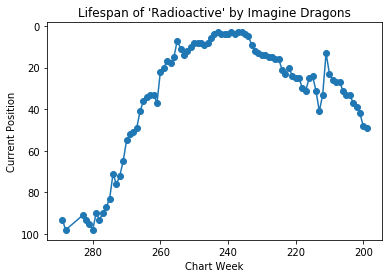

In [15]:
# First, let's grab the relevant data
rdact = sep_df.loc[(sep_df['Song Name'] == "Radioactive") & (sep_df['Artist'] == 'Imagine Dragons')]

# Now, graph the data with the Current Position on the Y axis and the Week of Chart on the X axis
x = rdact['Week of Chart']
y = rdact['Current Position']
plt.plot(x, y, '-o')
plt.xlabel('Chart Week')
plt.ylabel('Current Position')
plt.title("Lifespan of 'Radioactive' by Imagine Dragons")
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.show()

# TODO: Analyze

Looks like our winner is "Radioactive" by Imagine Dragons, with a whopping ***87 straight weeks*** spent on the Billboard Hot 100. This record was reached 199 weeks ago from 24 February 2018, or approximately the date 9 May 2014. The song initially debuted on 18 August 2012 and was on the chart until that date.

blah blah blah blah


.... now let's look at the artists that appear the *most* on the charts.

In [16]:
# Create a dict of values where key = artist name, value = number of appearances
most = {}

# Iterate through our dataframe
for index, series in sep_df.iterrows():
    
    # Grab name of artist for the current row
    curr = series['Artist']
    
    # If the artist isn't already in the dict, add them
    if curr not in most.keys():
        
        most[curr] = 1
    
    # They are there, so increment their number
    else:
        
        num = most.get(curr)
        num += 1
        most[curr] = num
        

Now, let's look at a graph of the top 10 artists with the most appearances on the charts

### **NOTE**: Do not run the cell directly below this one more than one time per instance of the current kernel! Doing so will cause errors with the output!

In [17]:
# Create lists to store relevant top 10 data
top10_songs = []
top10_artists = []

# Grab the top 10, in order from 1-10
for num in range(10):

    max_value = max(most.keys(), key=lambda k: most[k])
    top10_artists.append(max_value)
    top10_songs.append(most.get(max_value))
    del most[max_value]
    

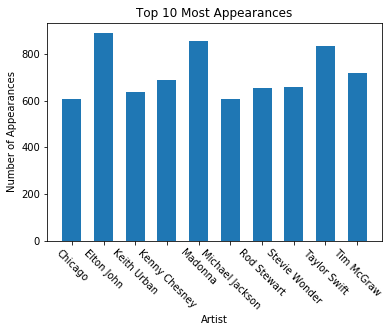

In [18]:
# Plot the top 10
plt.bar(top10_artists, top10_songs, width=0.6)

plt.xlabel('Artist')
plt.xticks(rotation=-45)
plt.ylabel('Number of Appearances')
plt.title("Top 10 Most Appearances")
plt.show()

# TODO: Analyze

In [19]:
"""
Takes in the user inputted artist name and returns a DataFrame of all of the
number 1 hits for that artist

Params: artist: The artist name to search for
Return: A DataFrame of number 1 hits for an artist, cleaned up. If artist
has no number 1 hits, an empty DataFrame is returned
"""
def find_no_1s(artist):
    
    number1s = sep_df.loc[(sep_df['Peak Position'] == 1) & (sep_df['Artist'] == artist)]

    
    number1s.drop_duplicates(['Song Name'], keep='last', inplace=True)
    number1s.reset_index(inplace=True)
    return number1s

"""
Takes in a name of a song and an artist name, creates a DataFrame for that artist/song pair,
builds a graph of that relationship, then returns that graph for plotting.

Params: artist: The artist name to search for
        songname: The song title to search for
Return: A graph of the lifespan of the given song
"""
def display_results(songname, artist):
    
    # First, let's grab the relevant data
    rdact = sep_df.loc[(sep_df['Song Name'] == songname) & (sep_df['Artist'] == artist)]

    # Now, graph the data with the Current Position on the Y axis and the Week of Chart on the X axis
    x = rdact['Week of Chart']
    y = rdact['Current Position']
    plt.plot(x, y, '-o')
    plt.xlabel('Chart Week')
    title_string = "Lifespan of '" + songname + "' by " + artist
    plt.title(title_string)
    plt.ylabel('Current Position')
    plt.gca().invert_xaxis()
    plt.gca().invert_yaxis()
    
    return plt

Please enter an artist to search for (including 'Featuring' if you want features). Type 'Q' to quit: Drake



/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Your artist's No. 1 hits are: 
0    God's Plan
Name: Song Name, dtype: object
Please type the name of a song from the list below to search for: God's Plan


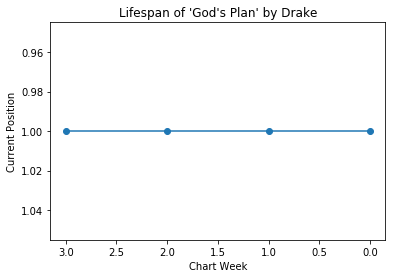

Please enter an artist to search for (including 'Featuring' if you want features). Type 'Q' to quit: Chicago

Your artist's No. 1 hits are: 
0                Look Away
1    Hard To Say I'm Sorry
2      If You Leave Me Now
Name: Song Name, dtype: object
Please type the name of a song from the list below to search for: Look Away


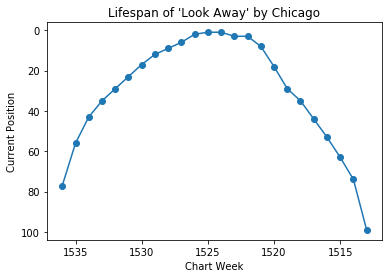

Please enter an artist to search for (including 'Featuring' if you want features). Type 'Q' to quit: The Beatles

Your artist's No. 1 hits are: 
0     The Long And Winding Road/For You Blue
1                                  Let It Be
2                    Come Together/Something
3                                   Hey Jude
4                              Hello Goodbye
5                       All You Need Is Love
6                                 Penny Lane
7                           Paperback Writer
8                         We Can Work It Out
9                                  Yesterday
10                                     Help!
11                            Ticket To Ride
12                         Eight Days A Week
13                               I Feel Fine
14                        A Hard Day's Night
15                                Love Me Do
16                         Can't Buy Me Love
17                             She Loves You
18                  I Want To Hold Your Hand


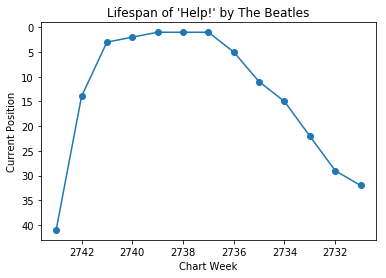

Please enter an artist to search for (including 'Featuring' if you want features). Type 'Q' to quit: q



In [20]:
# Create an interactive graph plotting section where users can see the lifespan of different songs
# using the above functions.

try:
    
    while True:
        
        # Output the prompt and grab the user's input
        std.write("Please enter an artist to search for (including 'Featuring' if you want features). ")
        std.write('Type \'Q\' to quit: ')
        to_search = input()
        print()
    
        # Verify that they don't want to end the program
        if to_search.upper() == 'Q':
            raise KeyboardInterrupt
        
        # Call function to get the dataframe
        result = find_no_1s(to_search)
        
        # Make sure the dataframe has entries
        if(len(result) == 0):
            raise EOFError
            
        # Report to user, grab song name
        print("Your artist's No. 1 hits are: \n%s" % repr(result['Song Name']))
        item = input("Please type the name of a song from the list below to search for: ")
        
        exists = False
        try:
            
            # Iterate through the returned dataframe
            for ind, ser in result.iterrows():
            
                if item == ser['Song Name']:
                    exists = True
            
            # Make sure the user's entered song actually is a valid entry
            if exists == False:
                raise AssertionError
        
        # Handle case of user entering a song that is not a No. 1 Hit
        except(AssertionError):
            print("Song name '%s' not valid, try again" % item)
            continue
        
        # Call function to get the graph
        graph = display_results(item, to_search)
        
        # Display the graph to the user
        graph.show()
        
# Handle case of user entering artist that doesn't have any No. 1 hits
except(EOFError):
    print("ERROR: artist entered with no No. 1 hits")
    
# Handle case of user typing 'q' to quit
except(KeyboardInterrupt):
    pass

# TODO: Analyze